<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading-and-Cleaning" data-toc-modified-id="Data-Loading-and-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading and Cleaning</a></span></li><li><span><a href="#EDA,-Clustering-and-PCA" data-toc-modified-id="EDA,-Clustering-and-PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA, Clustering and PCA</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Обучение-финальной-модели" data-toc-modified-id="Обучение-финальной-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение финальной модели</a></span></li></ul></div>

### Data Loading and Cleaning

**Основные действия**
- загрузка данных
- реформатирование типов данных
- работа с пропусками
- выявления и работа с некорректными данными и выбросами
- категоризация данных

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(37)

In [2]:
# 1.1. Загрузка данных
train_full = pd.read_csv('course_project_train.csv')
test_full = pd.read_csv('course_project_test.csv')
display(train_full.head(), train_full.shape)
display(test_full.head(), test_full.shape)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


(7500, 17)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


(2500, 16)

In [3]:
# 1.2. Пропущенные данные и уникальные данные
# 1.2.1. Пользовательская функция
def show_nans(df):
    for col in df.columns:
        print(col)
        print(30*'.')
        print('number of unique:',len(df[col].unique()))
        print('number of nan records',df[col].isna().sum())
        print(30*'-')

In [4]:
# 1.2.2. Пропущенные данные и уникальные данные. Train dataset
show_nans(train_full)

Home Ownership
..............................
number of unique: 4
number of nan records 0
------------------------------
Annual Income
..............................
number of unique: 5479
number of nan records 1557
------------------------------
Years in current job
..............................
number of unique: 12
number of nan records 371
------------------------------
Tax Liens
..............................
number of unique: 8
number of nan records 0
------------------------------
Number of Open Accounts
..............................
number of unique: 39
number of nan records 0
------------------------------
Years of Credit History
..............................
number of unique: 408
number of nan records 0
------------------------------
Maximum Open Credit
..............................
number of unique: 6963
number of nan records 0
------------------------------
Number of Credit Problems
..............................
number of unique: 8
number of nan records 0
--------------

In [5]:
# 1.2.3 Пропущенные данные и уникальные данные. Test dataset
show_nans(test_full)

Home Ownership
..............................
number of unique: 4
number of nan records 0
------------------------------
Annual Income
..............................
number of unique: 1930
number of nan records 513
------------------------------
Years in current job
..............................
number of unique: 12
number of nan records 86
------------------------------
Tax Liens
..............................
number of unique: 8
number of nan records 0
------------------------------
Number of Open Accounts
..............................
number of unique: 35
number of nan records 0
------------------------------
Years of Credit History
..............................
number of unique: 345
number of nan records 0
------------------------------
Maximum Open Credit
..............................
number of unique: 2435
number of nan records 0
------------------------------
Number of Credit Problems
..............................
number of unique: 8
number of nan records 0
----------------

**Предлагаемые действия по пропущенным данным**
- Всего найдено 5 признаков с пропущенными данными, идентичные для тренировочной и тестовой выборок
- Во всех вариантах предлагается использовать замену данных
- Учитывая, что на тестовых данных отсутствуют классы, удаление строк - не предусмотрено
- Расчет средних значений для замены пропусков будет осуществляться только на тренировочной выборке
- Числовые признаки
  - Annual Income, Credit Score - будут заменены медианным значением
  - Years in current job - заменена на целое медианное значение 
    - при этом сама величина будет преобразована в категориальную сетку
  - Bankrupties - заменена на модальное значение
  - Months since last delinquent - вместо пропущенных значений будет поставлен 0, т.к. вероятнее всего отсутствующее значение говорит нам об отсутствии нарушений
    - учитывая специфическую природу переменной, значение 0 в полной мере не отражает смысла, поэтому будет введена дополнительная бинарная переменная - `delinquet_in_past`

In [6]:
# 1.2.4 Замена пропусков - подготовка данных
annual_income_median = train_full['Annual Income'].median()
credit_score_median = train_full['Credit Score'].median()
bankrupt_mode = 0.0

years_table = train_full['Years in current job'].value_counts()
years_int = []
for i in years_table.index:
    if i == '10+ years':
        years_int.append(10)
    elif i == '< 1 year':
        years_int.append(0)
    else:
        years_int.append(int(i[0]))
    
years_avg = [i*j for i,j in zip(np.array(years_int), years_table.values / years_table.sum())]
years_avg = str(int(round(sum(years_avg))))+' years'

In [7]:
# 1.2.5 Замена пропусков - реализация
train_full['Annual Income'].fillna(value=annual_income_median, inplace=True)
test_full['Annual Income'].fillna(value=annual_income_median, inplace=True)

train_full['Credit Score'].fillna(value=credit_score_median, inplace=True)
test_full['Credit Score'].fillna(value=credit_score_median, inplace=True)

train_full['Bankruptcies'].fillna(value=bankrupt_mode, inplace=True)
test_full['Bankruptcies'].fillna(value=bankrupt_mode, inplace=True)

train_full['Years in current job'].fillna(value=years_avg, inplace=True)
test_full['Years in current job'].fillna(value=years_avg, inplace=True)

train_full['Months since last delinquent'].fillna(value=0, inplace=True)
test_full['Months since last delinquent'].fillna(value=0, inplace=True)

train_full['Delinquent in past'] = [1 if i>0 else 0 for i in train_full['Months since last delinquent']]
test_full['Delinquent in past'] = [1 if i>0 else 0 for i in test_full['Months since last delinquent']]

print(f'число пропусков в TRAIN: {train_full.isna().sum().sum()}')
print(f'число пропусков в TEST: {test_full.isna().sum().sum()}')

число пропусков в TRAIN: 0
число пропусков в TEST: 0


In [8]:
# 1.3. Изучение некорректных данных и выбросов

# 1.3.1. Общие статистики

display(train_full.describe())
display(test_full.describe())

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Delinquent in past
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.325286e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,15.815200,0.116933,1.187318e+07,2.898332e+05,18314.454133,1063.877333,0.281733,0.453467
std,7.567551e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,22.649441,0.346904,3.192612e+07,3.178714e+05,11926.764673,1438.335832,0.449874,0.497863
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000
25%,9.311330e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,718.000000,0.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,0.000000
75%,1.499974e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,29.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,740.000000,1.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,1.000000


,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Delinquent in past
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2500.000000,2500.00000,2500.000000
mean,1.326182e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,15.614000,0.106800,1.215572e+07,2.963966e+05,18271.340000,1131.19520,0.453600
std,8.215127e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.616348,0.356994,3.226097e+07,3.783020e+05,11543.881469,1564.62781,0.497942
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.00000,0.000000
25%,9.365622e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,0.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,717.00000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,0.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.00000,0.000000
75%,1.488726e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,27.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,741.00000,1.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.00000,1.000000


**Анализ некорректных данных**
- потенциально некорректные данные могут быть связаны с максимальными значениями исходя из анализа выше
- при этом корректировка данных будет производится для обоих датасетов
- перечень тестов
  - визуальная проверка гистограмм и замена x>Q99 на Q99
    - Number of Open Accounts
    - Years of Credit History
  - проверка соответствия 2 признаков
    - Annual Income VS Current Credit Balance
    - Current Loan Amount VS Monthly Debt

Порог для кол-ва аккаунтов: 27.0, кол-во выбросов 62 из 7500
Порог для кол-ва лет: 40.40100000000002, кол-во выбросов 75 из 7500


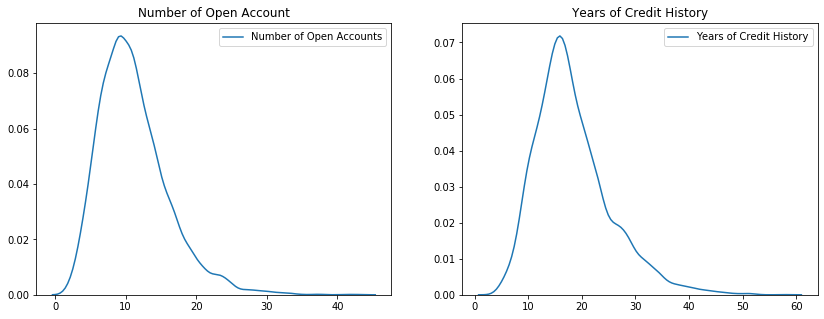

In [9]:
# 1.3.2 Визуальный анализ. Train DATASET
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_title('Number of Open Account')
ax[1].set_title('Years of Credit History')
sns.kdeplot(train_full['Number of Open Accounts'], ax=ax[0])
sns.kdeplot(train_full['Years of Credit History'], ax=ax[1]);

q99_open_accounts = train_full['Number of Open Accounts'].quantile(q=0.99)
q99_year_history = train_full['Years of Credit History'].quantile(q=0.99)
open_accounts_outliers = [i for i in train_full['Number of Open Accounts'] if i>q99_open_accounts]
year_history_outliers = [i for i in train_full['Years of Credit History'] if i>q99_year_history]

train_len = len(train_full)
print(f"Порог для кол-ва аккаунтов: {q99_open_accounts}, кол-во выбросов {len(open_accounts_outliers)} из {train_len}")
print(f"Порог для кол-ва лет: {q99_year_history}, кол-во выбросов {len(year_history_outliers)} из {train_len}")

Порог для кол-ва аккаунтов: 27.0, кол-во выбросов 16 из 2500
Порог для кол-ва лет: 40.40100000000002, кол-во выбросов 31 из 2500


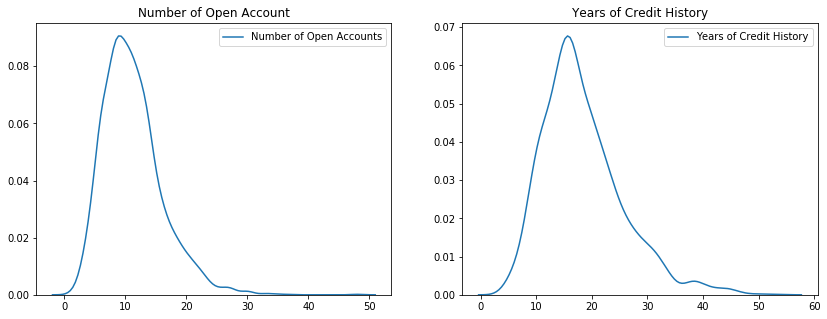

In [10]:
# 1.3.3 Визуальный анализ. TEST DATASET
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_title('Number of Open Account')
ax[1].set_title('Years of Credit History')
sns.kdeplot(test_full['Number of Open Accounts'], ax=ax[0])
sns.kdeplot(test_full['Years of Credit History'], ax=ax[1]);

open_accounts_outliers = [i for i in test_full['Number of Open Accounts'] if i>q99_open_accounts]
year_history_outliers = [i for i in test_full['Years of Credit History'] if i>q99_year_history]

test_len = len(test_full)
print(f"Порог для кол-ва аккаунтов: {q99_open_accounts}, кол-во выбросов {len(open_accounts_outliers)} из {test_len}")
print(f"Порог для кол-ва лет: {q99_year_history}, кол-во выбросов {len(year_history_outliers)} из {test_len}")

In [11]:
# 1.3.4 Преобразования в переменных

# ПРИМЕЧАНИЕ: несмотря на то, что в TRAIN DATASET 40 лет кредитной истории - это выброс, такой выброс имеет некоторый вес
# в TEST DATASET (на графике), поэтому данный признак корректироваться не будет. Корректировка будет произведена
# для признака open accounts
train_full['Number of Open Accounts'] = [q99_open_accounts if i>q99_open_accounts else i
                                         for i in train_full['Number of Open Accounts']]

test_full['Number of Open Accounts'] = [q99_open_accounts if i>q99_open_accounts else i 
                                        for i in test_full['Number of Open Accounts']]

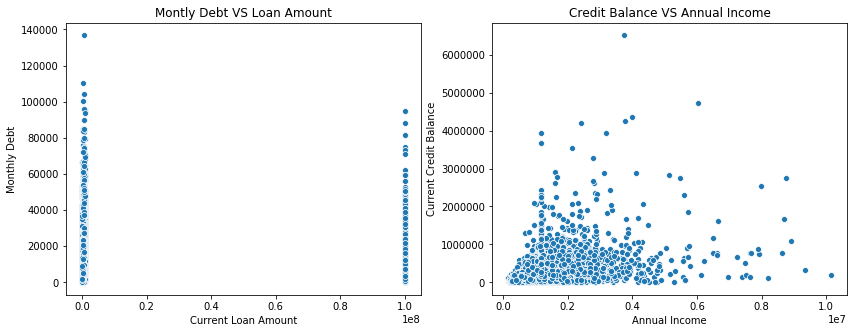

In [12]:
# 1.3.4. Визуальный анализ Current Loan Amount and Current Credit Balance. TRAIN DATASET
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_title('Montly Debt VS Loan Amount')
ax[1].set_title('Credit Balance VS Annual Income')

sns.scatterplot(x=train_full['Current Loan Amount'], y=train_full['Monthly Debt'],ax=ax[0])
sns.scatterplot(x=train_full['Annual Income'], y=train_full['Current Credit Balance'],ax=ax[1]);

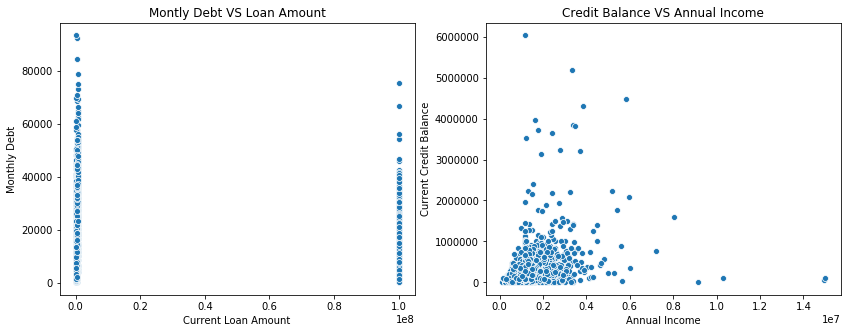

In [13]:
# 1.3.5. Визуальный анализ Current Loan Amount and Current Credit Balance. TEST DATASET
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].set_title('Montly Debt VS Loan Amount')
ax[1].set_title('Credit Balance VS Annual Income')

sns.scatterplot(x=test_full['Current Loan Amount'], y=test_full['Monthly Debt'],ax=ax[0])
sns.scatterplot(x=test_full['Annual Income'], y=test_full['Current Credit Balance'],ax=ax[1]);

**предлагаемые корректировки**
- исходя из визуального анализа:
  - имеются явные выбросы в Current Loan Amount
  - предлагается удалить с выборок Current Credit Balance > 4 000 000

In [14]:
# 1.3.6. Корректировки Current Loan Amount
loan_amount_threshold = train_full['Current Loan Amount'].quantile(q=0.88)

train_full['Current Loan Amount'] = [loan_amount_threshold if i>loan_amount_threshold else i
                                    for i in train_full['Current Loan Amount']]

test_full['Current Loan Amount'] = [loan_amount_threshold if i>loan_amount_threshold else i
                                    for i in test_full['Current Loan Amount']]

In [15]:
# 1.3.7. Корректировки Current Credit Balance

credit_balance_threshold = 4000000

train_full['Current Credit Balance'] = [credit_balance_threshold if i>credit_balance_threshold else i
                                    for i in train_full['Current Credit Balance']]

test_full['Current Credit Balance'] = [credit_balance_threshold if i>credit_balance_threshold else i
                                    for i in test_full['Current Credit Balance']]

**Преобразование данных**
- классификация признаков
    - числовые (непрерывные) признаки: Annual Income, Number of Open Accounts, Maximum Open Credit, Months since last delinquent, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score
    - категориальные признаки: Home Ownership, Years in current job, Purpose, Term, Delinquent in past
    - признаки, требующие отдельного изучения (на этапе EDA): Tax Liens, Number of Credit Problems, Bankruptcies
- преобразования:
  - INT: Tax Liens, Number of Open Accounts, Number of Credit Problems, Bankruptcies
  - ONE-HOT-ENCODER: Home Ownership, Years in current job, Purpose, Term, Delinquent in past
- особенность:
  - в тестовой выборке отсутствует Purpose=`Purpose_renewable energy`, поэтому после преобразования O-H-E добавим нулевой столбец в X_TEST

In [16]:
# 1.4. Преобразование данных

# 1.4.1. Float -> INT
cols_to_int = ['Tax Liens', 'Number of Open Accounts', 'Number of Credit Problems', 'Bankruptcies']
for col in cols_to_int:
    train_full[col] = train_full[col].astype(int)
    test_full[col] = test_full[col].astype(int)

# 1.4.2. One-hot-encoder
cols_to_cat = ['Home Ownership', 'Years in current job', 'Purpose', 'Term', 'Delinquent in past']
for col in cols_to_cat:
    train_full[col] = train_full[col].astype("category")
    test_full[col] = test_full[col].astype("category")


y_train = train_full['Credit Default']
X_train = train_full.drop(columns=['Credit Default'], axis=1)
X_test = test_full.copy()

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test['Purpose_renewable energy'] = np.zeros(len(X_test), dtype=int)

display(y_train.shape, X_train.shape, X_test.shape)

(7500,)

(7500, 41)

(2500, 41)

### EDA, Clustering and PCA

**основные этапы**
- Визуальный анализ Целевой переменной
- Визуальный анализ признаков
- Изучение наличия кластеров
- Корелляционный анализ
- PCA

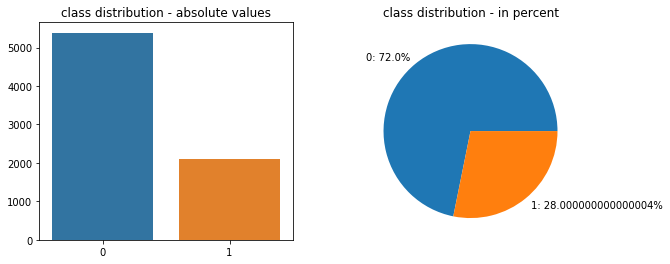

class values


0    5387
1    2113
Name: Credit Default, dtype: int64

In [17]:
# 2.1. Визуальный анализ целевой переменной
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].set_title('class distribution - absolute values')
ax[1].set_title('class distribution - in percent')
sns.barplot(list(y_train.value_counts().index), list(y_train.value_counts()), ax=ax[0])
labels_percent = [f'{i}: {round(j/len(y_train),2)*100}%' for i,j 
                  in zip(y_train.value_counts().index, y_train.value_counts())]
ax[1].pie(list(y_train.value_counts()/len(y_train)), labels=labels_percent)
plt.show()

print('class values')
display(y_train.value_counts())

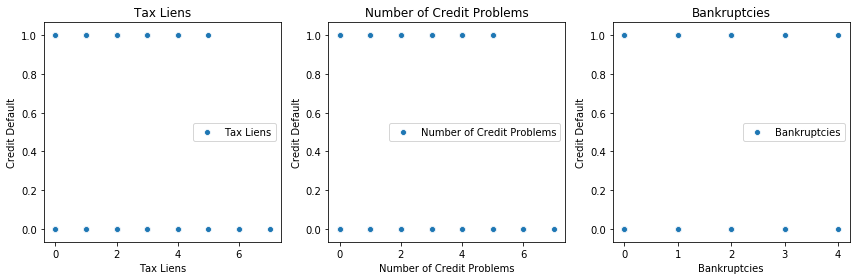

In [18]:
# 2.2. Визуальный анализ Tax Liens, Number of Credit Problems, Bankruptcies
cols_to_analyze = ['Tax Liens', 'Number of Credit Problems', 'Bankruptcies']
fig, ax = plt.subplots(1,3,figsize=(12,4))
for idx, col in enumerate(cols_to_analyze):
    ax[idx].set_title(col)
    sns.scatterplot(X_train[col],y_train,ax=ax[idx],label=col)
    plt.tight_layout();
# явной корелляции не наблюдается, 
# предлагается оставить данные переменные как numerical для избежания увеличения размерности пространства признаков

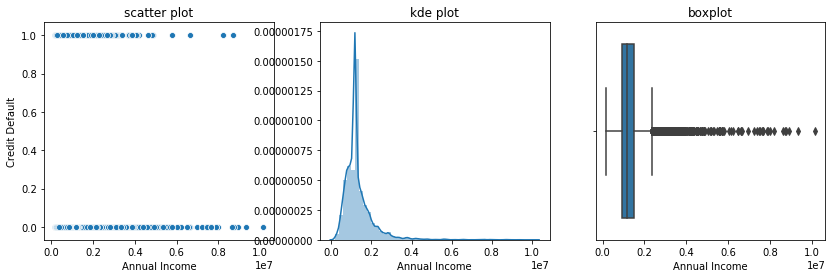

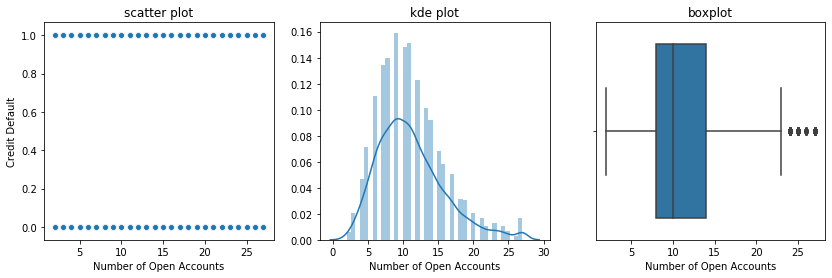

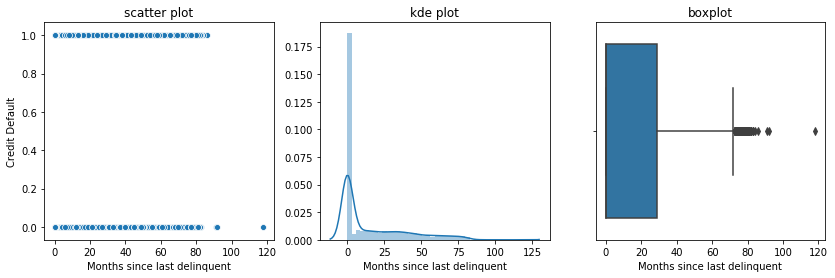

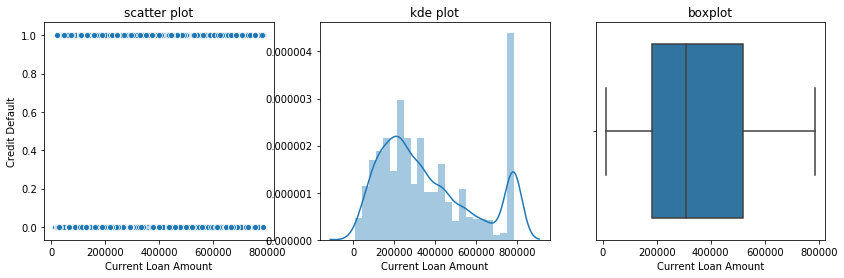

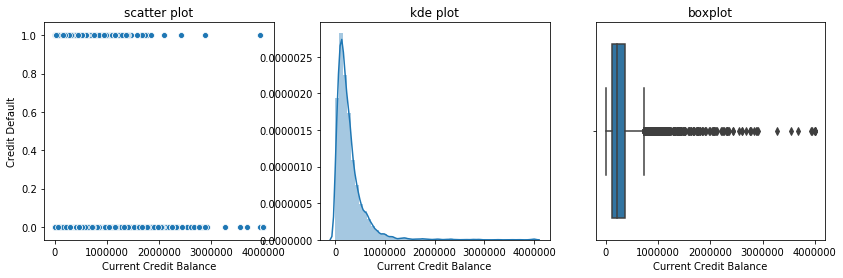

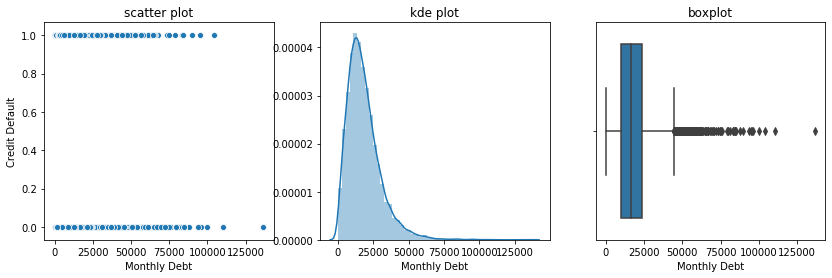

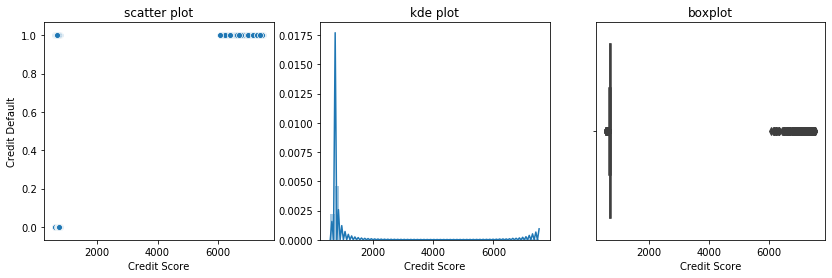

In [19]:
# 2.3. Визуальный анализ Непрерывных переменных
X_train.columns
cols_to_analyze = ['Annual Income', 'Number of Open Accounts', 'Months since last delinquent', 
                   'Current Loan Amount', 'Current Credit Balance','Monthly Debt', 'Credit Score']
for col in cols_to_analyze:
    fig, ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].set_title('scatter plot')
    ax[1].set_title('kde plot')
    ax[2].set_title('boxplot')
    sns.scatterplot(X_train[col],y_train,ax=ax[0])
    sns.distplot(X_train[col],ax = ax[1])
    sns.boxplot(X_train[col],ax=ax[2])

В целом наблюдаются некоторые скосы в ряде переменных, а также незначительные выбросы

{'Bankruptcies-Number of Credit Problems': 0.7308084877741166,
 'Delinquent in past_1-Months since last delinquent': 0.7666229154627877,
 'Number of Credit Problems-Bankruptcies': 0.7308084877741166,
 'Home Ownership_Rent-Home Ownership_Home Mortgage': -0.8379602425864155,
 'Home Ownership_Home Mortgage-Home Ownership_Rent': -0.8379602425864155,
 'Months since last delinquent-Delinquent in past_1': 0.7666229154627877}

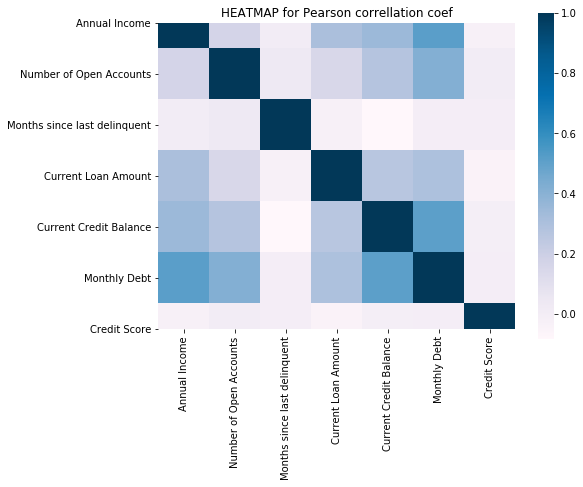

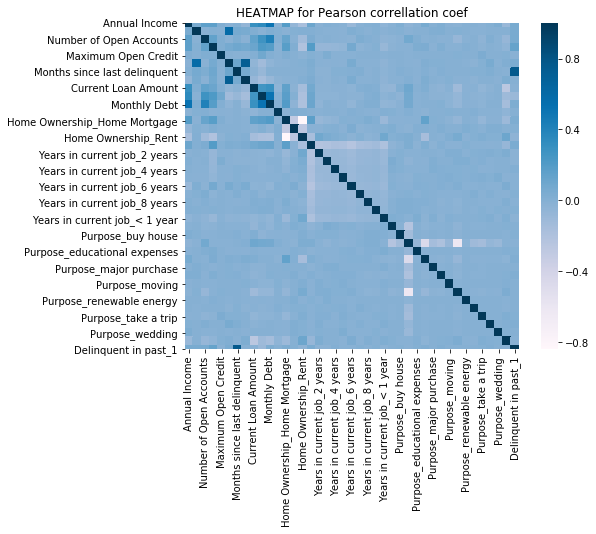

In [20]:
# 2.4. Корелляционный анализ
# 2.4.1. Пользовательская функция
def plot_corr_map(corr_matrix):
    "plot given correlation matrix in heatmap style"
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes()
    ax.set_title('HEATMAP for Pearson correllation coef')
    sns.heatmap(corr_matrix, square=True,ax=ax,cmap='PuBu');

# 2.4.2. Корелляция непрерывных данных
corr_matrix = X_train[cols_to_analyze].corr()
plot_corr_map(corr_matrix)

# 3.5.3. Корелляция всех признаков
corr_matrix = X_train.corr()
plot_corr_map(corr_matrix)

correlated_features = dict()
corr_threshold = 0.7

for col in corr_matrix.columns:
    for row in corr_matrix[col].index:
        if corr_threshold < abs(corr_matrix.loc[row, col]) < 1.0:
            pair = f'{row}-{col}'
            correlated_features[pair] = corr_matrix.loc[row, col]

display(correlated_features)

Как видно, имеется 3 пары высоко-кореллированных признаков, которые будут отсечены с применением PCA

In [21]:
# 2.5. Подбор параметров PCA

# 2.5.1. Преобразование данных - временное, ТОЛЬКО для подбора гиперпараметров
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)

In [22]:
# 2.5.2. PCA - поиск параметра
from sklearn.decomposition import PCA
break_even = [0.8, 0.9, 0.95, 0.975, 0.99]

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
var_vector = np.cumsum(pca.explained_variance_ratio_)

for level in break_even:
    temp_list = []
    for n in var_vector:
        if n<=level: temp_list.append(n)
    print(f'required number of components for {level*100}% of total VAR is {len(temp_list)}')  

required number of components for 80.0% of total VAR is 10
required number of components for 90.0% of total VAR is 15
required number of components for 95.0% of total VAR is 18
required number of components for 97.5% of total VAR is 22
required number of components for 99.0% of total VAR is 27


Таким образом можно сохранить 99% вариации, сократив пространство признаков с 41 до 27

X_train


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,...,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,3.309945e-17,-5.913788e-17,3.408234e-17,-4.253264e-17,6.461498e-18,-4.250489e-17,-4.641657e-18,4.434601e-17,1.502502e-18,2.553513e-19,...,-1.132668e-16,-7.550442e-18,-4.933091e-18,2.043412e-17,-3.424113e-18,-1.897834e-17,1.700862e-17,-3.625572e-18,-4.695041e-17,-2.901614e-19
std,6.951254e-01,5.216780e-01,4.813912e-01,4.580136e-01,4.387975e-01,3.459134e-01,3.166428e-01,2.989851e-01,2.820308e-01,2.787614e-01,...,1.892023e-01,1.496756e-01,1.240813e-01,1.200322e-01,1.052346e-01,1.030375e-01,8.966740e-02,8.631389e-02,7.749952e-02,7.215618e-02
min,-9.866266e-01,-6.319645e-01,-1.179453e+00,-6.774432e-01,-6.375210e-01,-3.434224e-01,-7.501779e-01,-5.906319e-01,-8.279868e-01,-7.133816e-01,...,-4.810252e-01,-3.021379e-01,-3.271696e-01,-3.408371e-01,-6.963191e-01,-4.173862e-01,-3.126635e-01,-5.543114e-01,-1.419287e-01,-7.352169e-01
25%,-7.615248e-01,-4.432949e-01,-3.458242e-01,-3.649172e-01,-3.007093e-01,-1.398469e-01,-1.378370e-01,-1.345906e-01,-1.319034e-01,-1.982530e-01,...,-1.328159e-01,-3.433022e-02,-8.487596e-02,-4.494358e-02,-1.141433e-02,-5.177740e-02,-5.232830e-02,-8.081907e-03,-3.095270e-02,-4.548296e-03
50%,1.021914e-01,-2.825968e-01,2.538979e-02,-1.830892e-01,-1.742413e-01,-1.031399e-01,-3.114112e-02,-2.591850e-02,-2.870207e-02,-3.759576e-02,...,-2.961950e-02,-1.188899e-02,-2.070241e-02,-2.918298e-03,-1.501401e-03,-1.992056e-02,-9.072262e-03,7.520539e-04,-1.764991e-02,-3.762824e-04
75%,6.472178e-01,5.461492e-01,3.038181e-01,2.756761e-01,3.818978e-01,-6.300839e-02,4.687430e-02,6.095360e-02,1.109425e-01,1.696040e-01,...,1.001738e-01,6.177708e-03,6.435224e-02,3.730457e-02,6.631913e-03,2.806125e-02,3.892285e-02,1.092540e-02,-4.255139e-03,3.580356e-03
max,1.098894e+00,9.024186e-01,1.259196e+00,1.492961e+00,1.200338e+00,1.319201e+00,9.447366e-01,9.069931e-01,9.867079e-01,9.895672e-01,...,9.642029e-01,8.344090e-01,6.708700e-01,6.564738e-01,7.097767e-01,9.081683e-01,9.562691e-01,6.016591e-01,3.312502e-01,7.418677e-01


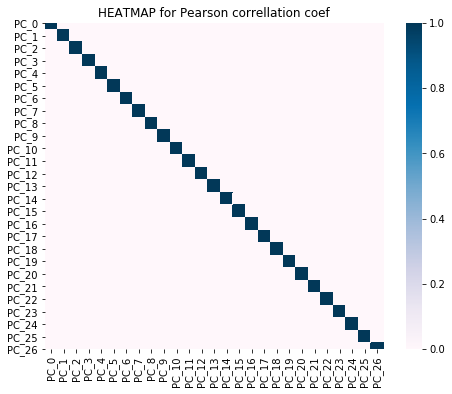

In [23]:
# 2.5.3. PCA - преобразование данных
pca_chosen = PCA(n_components=27)
X_train_pca = pca_chosen.fit_transform(X_train_scaled)

pc_names = []
for pc in range(X_train_pca.shape[1]):
    pc_names.append("PC_"+str(pc))

X_train_pca = pd.DataFrame(data = X_train_pca, columns=pc_names)

#scaler2 = MinMaxScaler()
#X_train_pca = scaler2.fit_transform(X_train_pca)
#X_train_pca = pd.DataFrame(data = X_train_pca, columns=pc_names)

print('X_train')
display(X_train_pca.describe())


# 2.5.4. Повторный корелляционный анализ
corr_matrix = X_train_pca.corr()
plot_corr_map(corr_matrix)

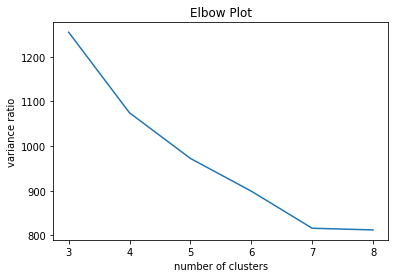

Silhouette Score for 3 clusters is 0.14858


In [24]:
# 2.6. Поиск кластеров (KMeans++)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

n_cluster_list, calinski_metric_list = [], []

for n_cluster in range(3,9):
    n_cluster_list.append(n_cluster)
    k_means = KMeans(n_clusters=n_cluster, random_state=37, init='k-means++', n_jobs=-1)
    k_means.fit(X_train_pca)
    calinski_metric_list.append(calinski_harabasz_score(X_train_pca, k_means.labels_))
    
plt.plot(n_cluster_list, calinski_metric_list)
plt.xlabel('number of clusters')
plt.ylabel('variance ratio')
plt.title('Elbow Plot')
plt.show()

k_means_optimal = KMeans(n_clusters=3, random_state=37, init='k-means++', n_jobs=-1)
k_means_optimal.fit(X_train_pca)
silhouette_avg = silhouette_score(X_train_pca, k_means.labels_)
print(f'Silhouette Score for 3 clusters is {round(silhouette_avg,5)}')

Выводы по кластеризации:
- Оптимальное кол-во кластеров - 3
- Вместе с тем Silhouette Score = 0,15, что говорит говорит о слабой мере кластеризации

### Hyperparameter Tuning

- На данном этапе произведены расчеты по нескольким моделям в целях поиска оптимальной модели с оптимальными гиперпараметрами


- Все расчеты производятся на X_train_pca
  - при этом я использую функцию `balance_df_by_target` - для балансировки классов

- Рассматриваемые алгоритмы:
  
  - Logistic Regression (в качестве Vanilla Model)
  - Support Vector Machine
  - Binomial Bayes Classifier
  - RandomForest
  - XG-boost
  - lightgbm
  - catboost


- Я решил не использовать KNN, поскольку этот метод считаю не совсем эффективным
  - кроме того, исходя из его специфики, по сути у него нет метода fit, вся аналитическая работа происходит на уровне метода predict
  - поэтому в реальных производственных задачах, когда время отклика (прогноза) критично, такой метод - не подходит


- Используемый метод Валидации k-fold validation


- Валидационная метрица - F1-score


- После подбора гиперпараметров все модели заново прогоняются, но уже в Пайплайне
  - предварительно TRAINSET делится на TRAIN + VALID
  - финальная модель определяется на этом этапе

- Результаты сохранены в Датафрейм


- Для удобства создан класс `Single_Model`, который
  - представляет собой декоратор-класс для моделей
  - в качестве аргументов инициализации принимает экземпляр модели (`model_instance`), датасет (`X`,`y`), `cv` и `param_grid`
    - если param_grid = {}, использует гиперпараметры по умолчанию
  - автоматически обучает модель (`_fit_model()`)
  - имеет метод вывода результатов (`show_grid_results`)
  - возвращает наилучшую (`best_model`), оптимальные параметры (`best_param`) and наивысшую метрику (`best_score`)
 
 
- В данной версии файла разделы  исходный код подбора параметров и моделей (#3.4-3.13), а также Раздел с ранжированием моделей в Pipelines исключен, однако оставлен в версии файла full `KairakbayevNB_solution_fullversion.ipynb`
  - для удобства здесь сохранена копия датафрейма с результатами оптимизированных моделей в разделе

In [25]:
# 3.1. Necessary imports

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [26]:
# 3.2. Пользовательский класс и функция балансировки

class Single_Model:
    '''
    decorator class for sklearn ML-models with grid-search and auto-fit given data
    '''
    
    def __init__(self, model_instance, X, y, cv, scoring, param_grid={}):
        self.model_instance = model_instance
        self.X = X
        self.y = y
        self.param_grid = param_grid
        self.cv = cv
        self.scoring = scoring
        self.model = self._fit_model()
    
    def _fit_model(self):
        self.model = GridSearchCV(estimator=self.model_instance, param_grid=self.param_grid, 
                                  cv=self.cv, return_train_score=True, scoring=self.scoring)
        self.model.fit(self.X, self.y)
        return self.model
    
    def best_model(self):
        return self.model.best_estimator_
    
    def show_grid_results(self):
        print('average results on validations subsets (if not mentioned):')
        print(70*'-')
        print(f'best params: {self.best_params()}')
        print(f'best score: {self.model.best_score_}')
        self.test_scores = self.model.cv_results_['mean_test_score']
        self.train_scores = self.model.cv_results_['mean_train_score']
        print(f'worst score: {self.test_scores.min()}')
        print(f'train subsets score range: {self.train_scores.min()} - {self.train_scores.max()}')
    
    def best_params(self):
        if self.param_grid == {}:
            self._best_model = self.best_model()
            return self._best_model.get_params()
        return self.model.best_estimator_.get_params()
    
    def best_score(self):
        return self.model.best_score_
    

    
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [27]:
# 3.3. Балансировка классов
TARGET_NAME = y_train.name
FEATURE_NAMES = X_train_pca.columns

df_for_balancing = pd.concat([X_train_pca, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
display(df_balanced[TARGET_NAME].value_counts())

X_train_pca_balanced = df_balanced.drop(columns=TARGET_NAME)
y_train_balanced = df_balanced[TARGET_NAME]

0    5387
1    4226
Name: Credit Default, dtype: int64

In [28]:
# 3.4. Vanilla Model (Logistic Regression)
cv = KFold(n_splits=4, shuffle=True, random_state=37)

logreg_instance = LogisticRegression(random_state=37, n_jobs=-1, class_weight='balanced')
logreg_default = Single_Model(logreg_instance, X_train_pca_balanced, y_train_balanced,
                              cv=cv, scoring='f1', param_grid={})

print('default model on grid search')
logreg_default.show_grid_results()
logreg_default_model = logreg_default.best_model()
print(70*'_')

default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 37, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
best score: 0.5945331735661439
worst score: 0.5945331735661439
train subsets score range: 0.5988169078192962 - 0.5988169078192962
______________________________________________________________________


In [29]:
# 3.5. Подбор гиперпараметров для ЛогРегрессии
logreg_grid = {
    'penalty': ['l1', 'l2'], #l2
    "tol": [1e-7, 1e-1, 1], # 1e-1
    "C": [0.01, 0.1, 1], # 0.1
    'max_iter': [100],
    'solver':['saga'],
    'multi_class': ['auto']
    }

logreg_optimum = Single_Model(logreg_instance, X_train_pca_balanced, y_train_balanced,
                              cv=cv, scoring='f1', param_grid=logreg_grid)

print('optimized model on grid search')
logreg_optimum.show_grid_results()
logreg_optimum_model = logreg_default.best_model()
print(70*'_')

optimized model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 37, 'solver': 'saga', 'tol': 0.1, 'verbose': 0, 'warm_start': False}
best score: 0.6101307929863798
worst score: 0.47511402348635257
train subsets score range: 0.48830529909240206 - 0.615250389485948
______________________________________________________________________


Как видно выше, поиск оптимальных параметров увеличил метрику незначительно, с 59.58 до 61.00, вместе с тем, видно, что переобучения нет

In [30]:
# 3.6. SVC - Linear Version

linearSvc_instance = LinearSVC(random_state=37, class_weight='balanced')
linearSvc_default = Single_Model(linearSvc_instance, X_train_pca_balanced, y_train_balanced,
                                  cv=cv, scoring='f1', param_grid={})


linearSvc_grid = {
    'penalty': ['l2'],
    "tol": [1e-5, 1e-2, 1], #1e-5
    "C": [0.1, 1, 10], #1.0
    'max_iter': [1000, 5000], #1000
    }

linearSvc_optimum = Single_Model(linearSvc_instance, X_train_pca_balanced, y_train_balanced,
                              cv=cv, scoring='f1', param_grid=linearSvc_grid)


print('default model on grid search')
linearSvc_default.show_grid_results()
linearSvc_default_model = linearSvc_default.best_model()
print(70*'_')

print('optimized model on grid search')
linearSvc_optimum.show_grid_results()
linearSvc_optimum_model = linearSvc_optimum.best_model()
print(70*'_')

default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1.0, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 37, 'tol': 0.0001, 'verbose': 0}
best score: 0.594449603567007
worst score: 0.594449603567007
train subsets score range: 0.6003001575090092 - 0.6003001575090092
______________________________________________________________________
optimized model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 37, 'tol': 1, 'verbose': 0}


Как видно выше, поиск оптимальных параметров увеличил метрику незначительно, с 59.44 до 60.2, вместе с тем, видно, что переобучения нет

In [31]:
# 3.7. SVC - NonLinear Version

Svc_instance = SVC(random_state=37, class_weight='balanced')
Svc_default = Single_Model(Svc_instance, X_train_pca_balanced, y_train_balanced,
                           cv=cv, scoring='f1', param_grid={})


Svc_grid = {
    'kernel': ['rbf'],
    "tol": [1, 1e-1, 1e-2], #1
    "degree": [1, 2, 3], #1
    'C': [1],
    }

Svc_optimum = Single_Model(Svc_instance, X_train_pca_balanced, y_train_balanced,
                              cv=cv, scoring='f1', param_grid=Svc_grid)


print('default model on grid search')
Svc_default.show_grid_results()
Svc_default_model = Svc_default.best_model()
print(70*'_')

print('optimized model on grid search')
Svc_optimum.show_grid_results()
Svc_optimum_model = Svc_optimum.best_model()
print(70*'_')

default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1.0, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 37, 'shrinking': True, 'tol': 0.001, 'verbose': False}
best score: 0.5713853188488935
worst score: 0.5713853188488935
train subsets score range: 0.5714916047757852 - 0.5714916047757852
______________________________________________________________________
optimized model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'p

Результаты нелинейной модели - хуже, чем у линейной версии SVM: f1 = 57.6

Примечания:
- в следующих 3 алгоритмах сетки параметров уже оптимизированы после некоторой внутренней работы и представлены в оптимальном варианте

In [32]:
# 3.8. RandomForest
rf_instance = RandomForestClassifier(random_state=37, class_weight='balanced', n_jobs=-1)
rf_default = Single_Model(rf_instance, X_train_pca_balanced, y_train_balanced,
                           cv=cv, scoring='f1', param_grid={})


rf_grid = {
    'n_estimators': [500], 
    'criterion': ['gini'], 
    'max_depth': [30], 
    }

rf_optimum = Single_Model(rf_instance, X_train_pca_balanced, y_train_balanced,
                              cv=cv, scoring='f1', param_grid=rf_grid)


print('default model on grid search')
rf_default.show_grid_results()
rf_default_model = rf_default.best_model()
print(70*'_')

print('optimized model on grid search')
rf_optimum.show_grid_results()
rf_optimum_model = rf_optimum.best_model()
print(70*'_')

default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': 37, 'verbose': 0, 'warm_start': False}
best score: 0.8091913453580005
worst score: 0.8091913453580005
train subsets score range: 0.9899399359115241 - 0.9899399359115241
______________________________________________________________________
optimized model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', '

По сравнению с линейными моделями, Случайный Лес показывает существенно лучшие результаты: f1 вырос до 84.09, хотя имеется риск переобучения вследствие большого кол-ва деревьев

In [33]:
# 3.9. Naive Bayes Classifier
nbc_instance = GaussianNB()
nbc_default = Single_Model(nbc_instance, X_train_pca_balanced, y_train_balanced,
                           cv=cv, scoring='f1', param_grid={})


nbc_grid = {
    'var_smoothing': [1e-2, 1e-9, 1e-15],
    }

nbc_optimum = Single_Model(nbc_instance, X_train_pca_balanced, y_train_balanced,
                              cv=cv, scoring='f1', param_grid=nbc_grid)


print('default model on grid search')
nbc_default.show_grid_results()
nbc_default_model = nbc_default.best_model()
print(70*'_')

print('optimized model on grid search')
nbc_optimum.show_grid_results()
nbc_optimum_model = nbc_optimum.best_model()
print(70*'_')

default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'priors': None, 'var_smoothing': 1e-09}
best score: 0.3878980931979117
worst score: 0.3878980931979117
train subsets score range: 0.38942859233632576 - 0.38942859233632576
______________________________________________________________________
optimized model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'priors': None, 'var_smoothing': 1e-09}
best score: 0.3878980931979117
worst score: 0.36368802868728095
train subsets score range: 0.36386532762014706 - 0.38942859233632576
______________________________________________________________________


Классификатор Наивного Байеса - показывает наихудшие результаты, f1=38.9

In [34]:
# 3.10. XG-Boost

xgboost_instance = xgb.XGBClassifier(n_jobs=-1, random_state=37)

xgboost_default = Single_Model(xgboost_instance, X_train_pca_balanced, y_train_balanced,
                           cv=cv, scoring='f1', param_grid={})


xgboost_grid = {
    'booster': ['gbtree'], 
    'n_estimators': [500],
    'learning_rate': [0.01], #0.01
    'max_depth': [20],
    'base_score': [0.8],
    'reg_lambda': [0.1] # 0.1
    }

xgboost_optimum = Single_Model(xgboost_instance, X_train_pca_balanced, y_train_balanced,
                              cv=cv, scoring='f1', param_grid=xgboost_grid)


print('default model on grid search')
xgboost_default.show_grid_results()
xgboost_default_model = xgboost_default.best_model()
print(70*'_')

print('optimized model on grid search')
xgboost_optimum.show_grid_results()
xgboost_optimum_model = xgboost_optimum.best_model()
print(70*'_')

default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': -1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 37, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
best score: 0.5755822834950273
worst score: 0.5755822834950273
train subsets score range: 0.6138567415435782 - 0.6138567415435782
______________________________________________________________________
optimized model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'base_sc

Данный метод показывает хорошую метрику = 83.6

In [35]:
# 3.11. LGBM-Boost - gbdt-kernel

lgbm_instance = lgbm.LGBMClassifier(n_jobs=-1, random_state=37, class_weight='balanced')

lgbm_default = Single_Model(lgbm_instance, X_train_pca_balanced, y_train_balanced,
                           cv=cv, scoring='f1', param_grid={})


lgbm_grid = {
    'boosting_type': ['gbdt'], 
    'n_estimators': [100],
    'learning_rate': [1], #0.1
    'max_depth': [16],
    'reg_lambda': [1], 
    'num_leaves': [100] 
    }

lgbm_optimum = Single_Model(lgbm_instance, X_train_pca_balanced, y_train_balanced,
                              cv=cv, scoring='f1', param_grid=lgbm_grid)

print('default model on grid search')
lgbm_default.show_grid_results()
lgbm_default_model = lgbm_default.best_model()
print(70*'_')

print('optimized model on grid search: gbdt-type')
lgbm_optimum.show_grid_results()
lgbm_optimum_model = lgbm_optimum.best_model()
print(70*'_')

default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 37, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
best score: 0.7381141858294866
worst score: 0.7381141858294866
train subsets score range: 0.9253872559604969 - 0.9253872559604969
______________________________________________________________________
optimized model on grid search: gbdt-type
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'boosti

Данный метод показывает хорошую метрику = 81.8, при этом сложность модели (кол-во деревьев и глубина) - меньше, чем у Random-Forest and XG-Boost, а время на обучение - меньше

Также предварительно проверялась работа алгоритма CAT-Boost: при сопоставимых результатах, алгоритм работал существенно медленнее, поэтому в данной версии - исключен из анализа

In [45]:
# 3.12. Итоговое сравнение всех моделей на валидационной выборке
from sklearn.model_selection import train_test_split
X_train_pipe, X_valid_pipe, y_train_pipe, y_valid_pipe = train_test_split(X_train_pca_balanced, y_train_balanced, 
                                                                        test_size=0.20, random_state=37)


models = [GaussianNB(**nbc_optimum_model.get_params()),
          LogisticRegression(**logreg_optimum_model.get_params()),
          LinearSVC(**linearSvc_optimum_model.get_params()),
          SVC(**Svc_optimum_model.get_params()),
          RandomForestClassifier(**rf_optimum_model.get_params()),
          xgb.XGBClassifier(**xgboost_optimum_model.get_params()),
          lgbm.LGBMClassifier(**lgbm_optimum_model.get_params())]

model_labels = ['naive_bayes', 'logreg','LinearSVM', 'SVM','Random Forest', 'XG-Boost', 'LGBM-Boost']

#all_models_results = dict.fromkeys(model_labels)
all_models_results = pd.DataFrame(columns=['label', 'f1_valid_score', 'hyperparams'])
label_list, score_list, param_list = [], [], []

for m, l in zip(models, model_labels):
    m.fit(X_train_pipe, y_train_pipe)
    y_pred_valid = m.predict(X_valid_pipe)
    score_list.append(f1_score(y_valid_pipe, y_pred_valid))
    param_list.append(m.get_params())
    label_list.append(l)

all_models_results['label'] = label_list
all_models_results['f1_valid_score'] = score_list
all_models_results['hyperparams'] = param_list

display(all_models_results)

Как видно из результатов выше, все методы показывают высокое значение f1_score в пределах 83-86%
- несмотря на то, что наилучший результат у RandomForest, все таки я выберу LGBM-Boost, который имеет сравнительно меньшую сложность
- следующие параметры выбраны в качестве оптимальных
  -  'boosting_type': 'gbdt', 
  - 'n_estimators': 100,
  -  'learning_rate': 1, 
  -  'max_depth': 16,
  - 'reg_lambda': 1, 
  -  'num_leaves': 100

In [47]:
# 3.13. Сохранение модели и сравнительной таблицы
import pickle

final_model = lgbm_optimum_model

with open('chosen_model', 'wb') as file:
    pickle.dump(final_model, file)

with open('table', 'wb') as file:
    pickle.dump(all_models_results, file)

### Обучение финальной модели

**описание действий**
- Загрузка выбранного экземпляра модели
- Подготовка данных (Тестовая Выборка)
- Обучение модели
- Генерация прогноза

In [48]:
# 4.1. Загрузка выбранной модели и сравнительной таблицы
with open('chosen_model', 'rb') as file:
    model = pickle.load(file)

with open('table', 'rb') as file:
    comparative_table = pickle.load(file)

display(comparative_table)

,label,f1_valid_score,hyperparams
0,naive_bayes,0.407666,"{'priors': None, 'var_smoothing': 1e-09}"
1,logreg,0.598856,"{'C': 1.0, 'class_weight': 'balanced', 'dual':..."
2,LinearSVM,0.591811,"{'C': 1, 'class_weight': 'balanced', 'dual': T..."
3,SVM,0.575113,"{'C': 1, 'cache_size': 200, 'class_weight': 'b..."
4,Random Forest,0.858938,"{'bootstrap': True, 'class_weight': 'balanced'..."
5,XG-Boost,0.845455,"{'base_score': 0.8, 'booster': 'gbtree', 'cols..."
6,LGBM-Boost,0.833703,"{'boosting_type': 'gbdt', 'class_weight': 'bal..."


X_test


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.023717,-0.424742,-0.138180,0.049477,0.249783,0.022196,0.001966,-0.015834,-0.040859,-0.059780,...,0.012154,0.018411,0.024509,0.119247,0.021740,-0.053387,-0.007244,-0.034704,0.016648,0.005591
std,0.678292,0.116067,0.479119,0.455943,0.501214,0.364206,0.300397,0.293203,0.299439,0.300508,...,0.189974,0.151518,0.132004,0.175185,0.109597,0.123405,0.093620,0.086204,0.076771,0.051424
min,-0.980561,-0.632692,-1.192960,-0.557899,-0.619365,-0.327502,-0.729365,-0.592441,-0.891306,-0.920418,...,-0.460701,-0.309099,-0.323123,-0.208070,-0.665099,-0.596859,-0.271394,-0.613552,-0.158658,-0.736345
25%,-0.726095,-0.509219,-0.469413,-0.322576,-0.231470,-0.129679,-0.121121,-0.144529,-0.189015,-0.268405,...,-0.120130,-0.016489,-0.066803,-0.004935,0.006837,-0.114418,-0.057823,-0.055749,-0.012569,0.001487
50%,0.159148,-0.429608,-0.083151,-0.180511,0.417326,-0.092162,-0.016520,-0.027854,-0.056126,-0.078704,...,-0.024016,0.007795,0.004433,0.038854,0.020815,-0.046792,-0.015626,-0.043970,0.000440,0.005841
75%,0.646343,-0.351960,0.186350,0.333569,0.696304,-0.055379,0.053092,0.054898,0.100180,0.140637,...,0.109045,0.028008,0.090389,0.199154,0.032252,-0.010159,0.030095,-0.005809,0.016253,0.010541
max,1.031080,-0.048211,1.154016,1.478744,1.203928,1.331251,0.955516,0.865750,0.943783,1.024517,...,0.915303,0.842727,0.703165,0.858780,0.734870,1.105072,0.787353,0.544691,0.428016,0.665897


(9613, 27) (2500, 27) (9613,)


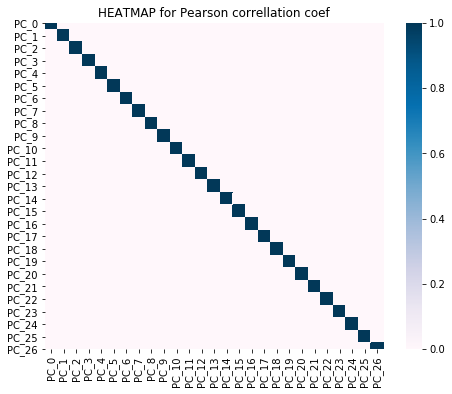

In [49]:
# 4.2. Подготовка тестовых данных и проверка на корелляцию
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test.columns)

X_test_pca = pca_chosen.transform(X_test_scaled)

pc_names = []
for pc in range(X_test_pca.shape[1]):
    pc_names.append("PC_"+str(pc))

X_test_pca = pd.DataFrame(data = X_test_pca, columns=pc_names)

print('X_test')
display(X_test_pca.describe())

corr_matrix = X_train_pca.corr()
plot_corr_map(corr_matrix)

print(X_train_pca_balanced.shape, X_test_pca.shape, y_train_balanced.shape)

In [50]:
# 4.3. Обучение модели и генерация прогноза
model.fit(X_train_pca_balanced, y_train_balanced)
y_pred = model.predict(X_test_pca)
y_pred = pd.DataFrame(y_pred, columns=['Credit Default'])
print(y_pred.shape)

(2500, 1)


In [51]:
# 4.4. Импорт результатов
import csv
filename = 'KairakbayevNB_predictions.csv'
y_pred.to_csv(filename, index=None)